In [2]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [27]:
img = cv2.imread('drone.3.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

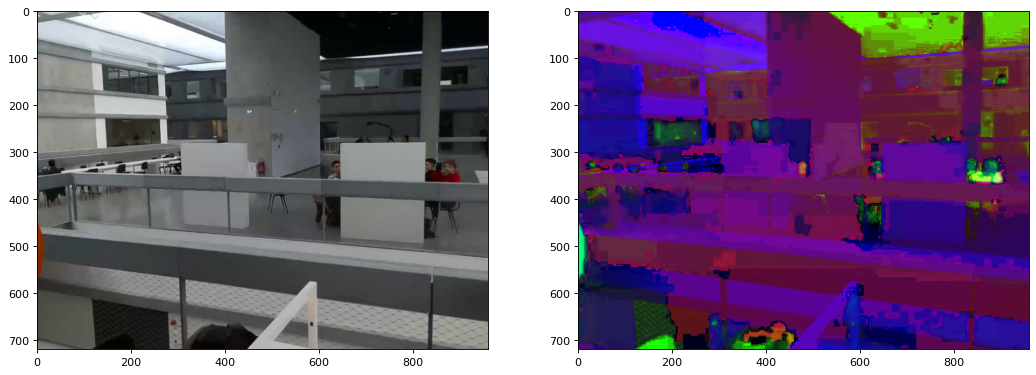

In [28]:
fig = plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(hsv)
plt.show()

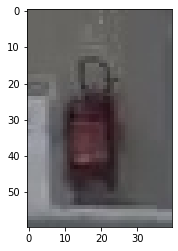

In [29]:
fe = img[300:360,460:500]
plt.imshow(fe)

In [30]:
fe = cv2.GaussianBlur(fe, (3, 3), 1)

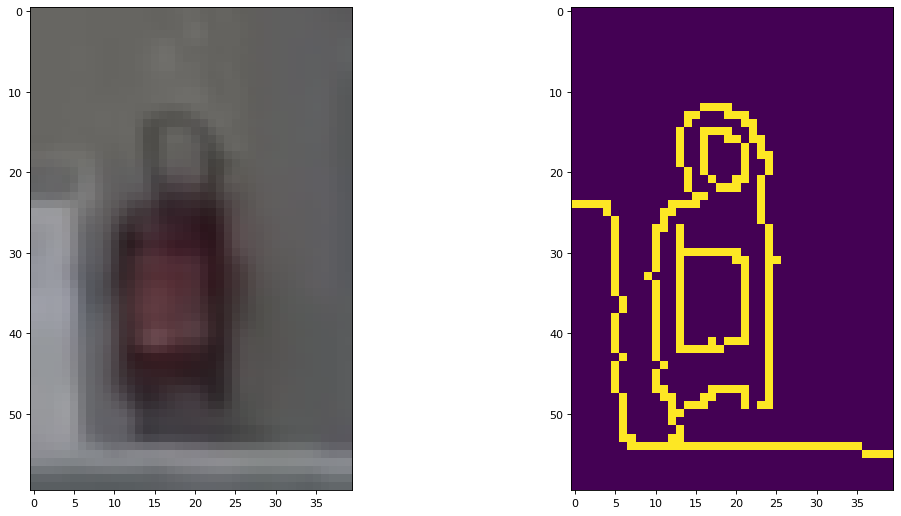

In [31]:
edges = cv2.Canny(fe, 50, 200)

fig = plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.imshow(fe)
plt.subplot(122), plt.imshow(edges)
plt.show()

In [32]:
hsv[320+5,600+36]

array([ 10, 107,  43], dtype=uint8)

In [33]:
lower_red = np.array([0,90,10])
upper_red = np.array([5,255,255])
low_hue_mask = cv2.inRange(hsv, lower_red, upper_red)

# Range for upper range
lower_red = np.array([170,90,10])
upper_red = np.array([180,255,255])
high_hue_mask = cv2.inRange(hsv, lower_red, upper_red)

# Generating the final mask to detect red color
mask = low_hue_mask + high_hue_mask

In [34]:
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, np.ones((13,13), np.uint8))

# Segmenting the cloth out of the frame using bitwise and with the inverted mask
clipped_image_black = cv2.bitwise_and(img, img, mask=mask)

In [35]:
clipped_image_white = clipped_image_black.copy()
clipped_image_white[np.any(clipped_image_white != [0, 0, 0], axis=-1)] = 255
clipped_image_white[np.any(clipped_image_white == [0, 0, 0], axis=-1)] = 0

(<matplotlib.axes._subplots.AxesSubplot at 0x7f07b97d2310>,
 <matplotlib.image.AxesImage at 0x7f07c00aa130>)

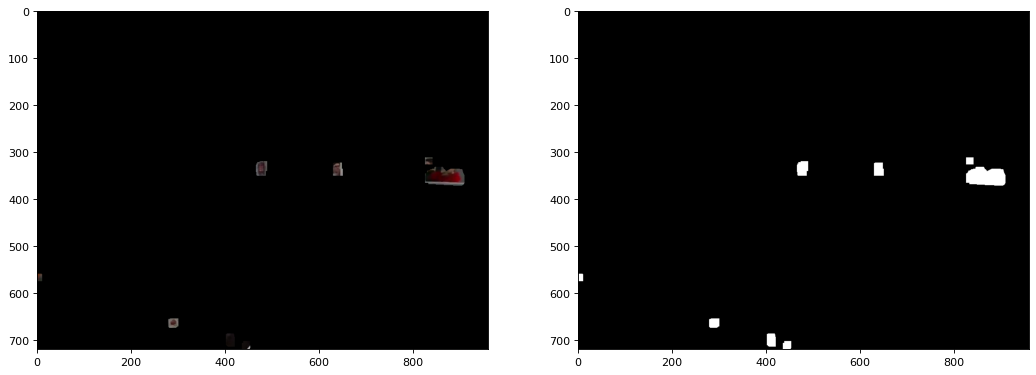

In [36]:
fig = plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.imshow(clipped_image_black)
plt.subplot(122), plt.imshow(clipped_image_white)

In [37]:
np.any(clipped_image_white != [0, 0, 0], axis=-1)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [38]:
contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

In [39]:
# Filtering of contours
rectangleContours = []

for contour in contours:
    xg, yg, wg, hg = cv2.boundingRect(contour)
    if hg > wg:
        rectangleContours.append(contour)

In [40]:
red_area = max(rectangleContours, key=cv2.contourArea)
xg, yg, wg, hg = cv2.boundingRect(red_area)
rectangle = cv2.rectangle(img, (xg, yg), (xg+wg, yg+hg), (0, 255, 0), 2)

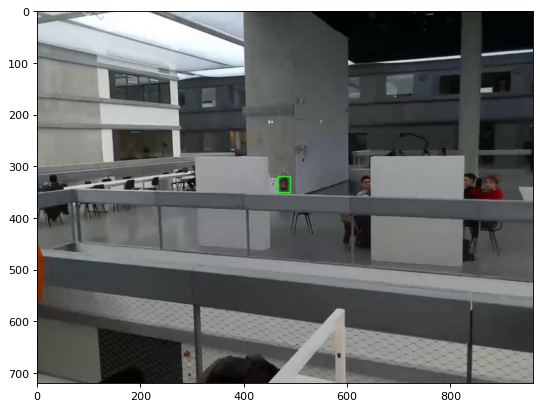

In [41]:
fig = plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img)
plt.show()